In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plot # module for plotting
import seaborn as sns
import sklearn as sklearn
from sklearn import linear_model, cross_validation, metrics, svm, ensemble
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.cross_validation  import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import sem
import statsmodels.api as sm
import itertools

import matplotlib.pyplot as plt # module for plotting 
from matplotlib import interactive, font_manager
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

dark2_colors = [(0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254)]

cmap_set1 = ListedColormap(['#ff9900', '#00b300', '#0000e6' ])
dark2_cmap=ListedColormap(dark2_colors)

%matplotlib inlinedef set_mpl_params():
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

set_mpl_params()


In [2]:
def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 150
    rcParams['axes.color_cycle'] = dark2_colors
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 14
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\Users\Somya\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
data_2016=pd.read_csv('G:\BD_Project_Data\Jan_2016.csv')

In [82]:
data_2016=pd.read_csv('G:\Dataset2016\Dataset2016.csv')

C:\Users\Somya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_2016.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 29'], dtype='object')

In [21]:
data_2016.__delitem__('X')

In [26]:
data_2016.__delitem__('Unnamed: 0')

In [27]:
data_2016.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DepHr', 'ArrHr'], dtype='object')

In [5]:
data_2016 = data_2016[data_2016['CANCELLED']==0]
data_2016.drop(['CANCELLED', 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1, inplace=True)

In [6]:
data_2016['Departure_Hour'] = data_2016['CRS_DEP_TIME']//100
# Hour of CRS Arrival Time
data_2016['Arrival_Hour'] = data_2016['CRS_ARR_TIME']//100

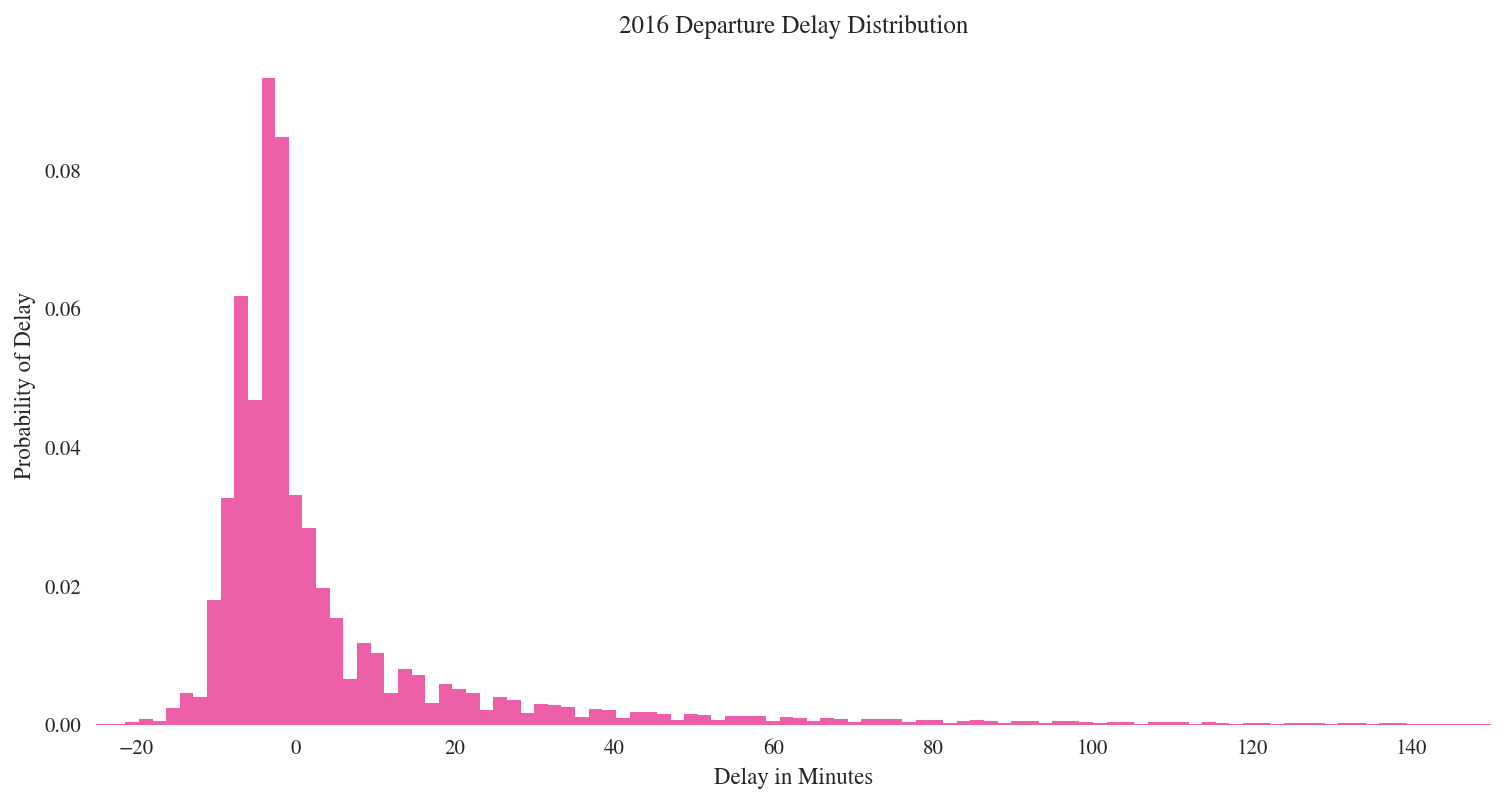

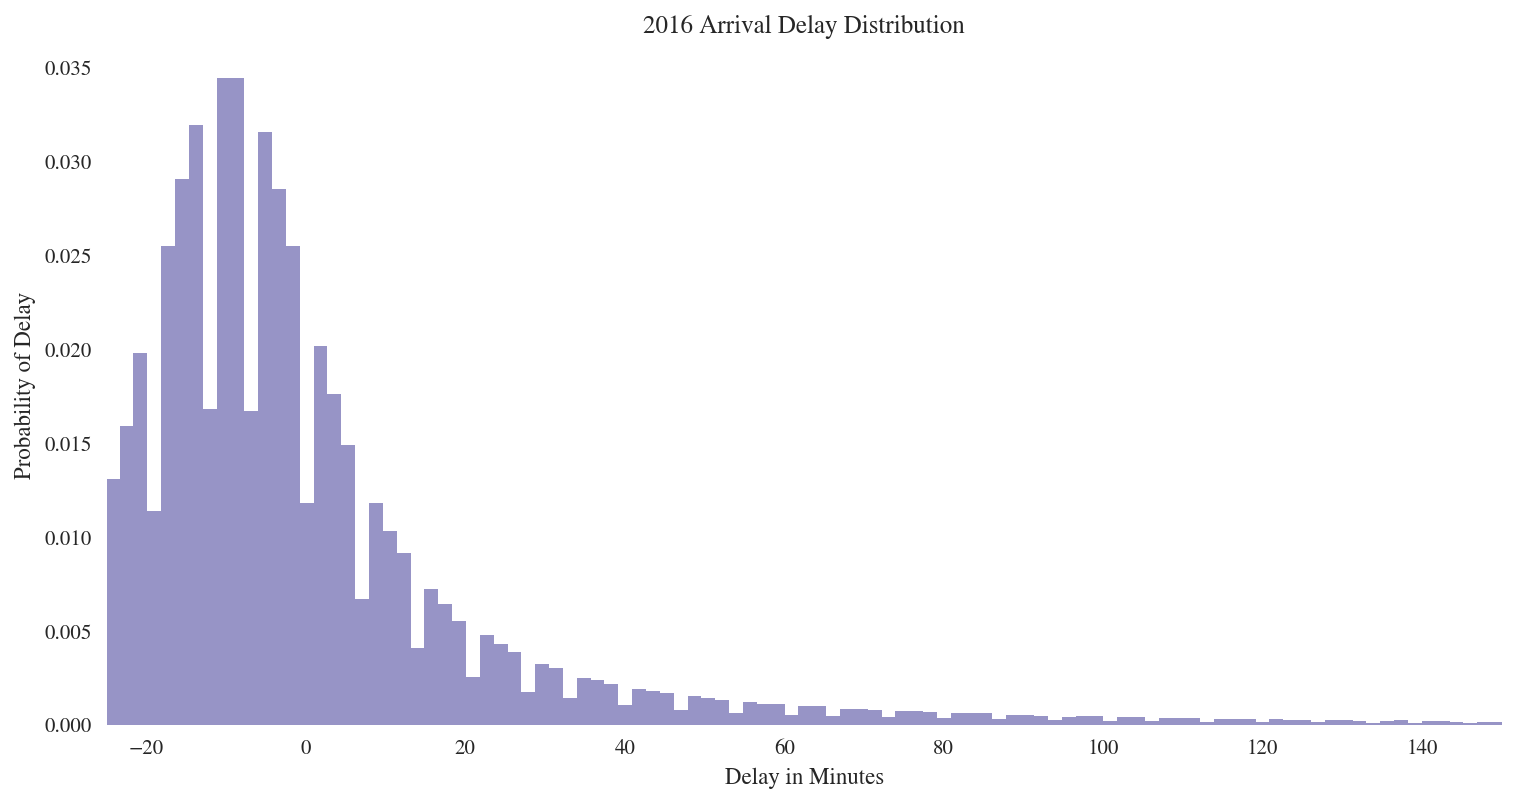

In [7]:
plot.figure(figsize=(12, 6))
plot.hist(data_2016.DEP_DELAY.dropna(),bins = 1000,normed=1, alpha=0.75, color=dark2_colors[0])
plot.xlim(-25,150)
plot.xlabel('Delay in Minutes')
plot.ylabel('Probability of Delay')
plot.title('2016 Departure Delay Distribution')
remove_border()

# plt arrival delay distribution
plot.figure(figsize=(12, 6))
plot.hist(data_2016.ARR_DELAY.dropna(),bins = 1000,normed=1, alpha=0.75, color=dark2_colors[2])
plot.xlim(-25,150)
plot.xlabel('Delay in Minutes')
plot.ylabel('Probability of Delay')
plot.title('2016 Arrival Delay Distribution')
remove_border()

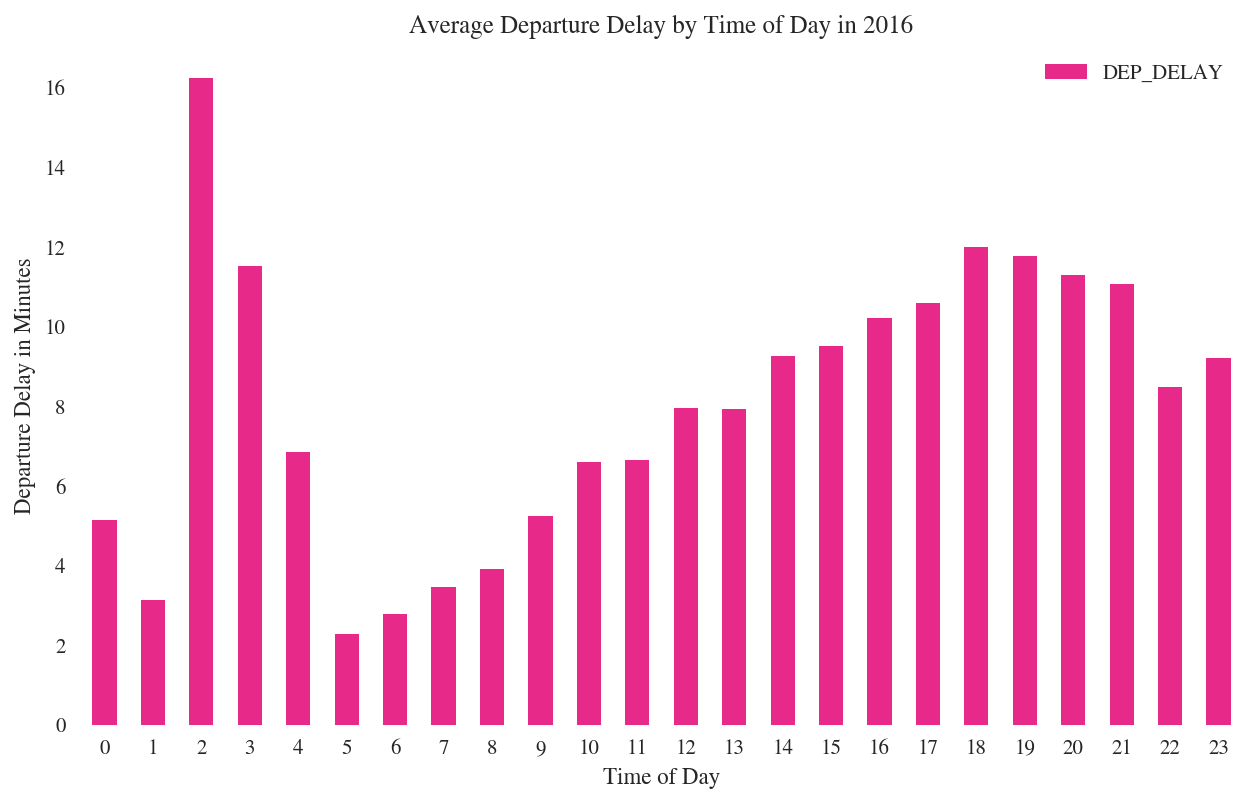

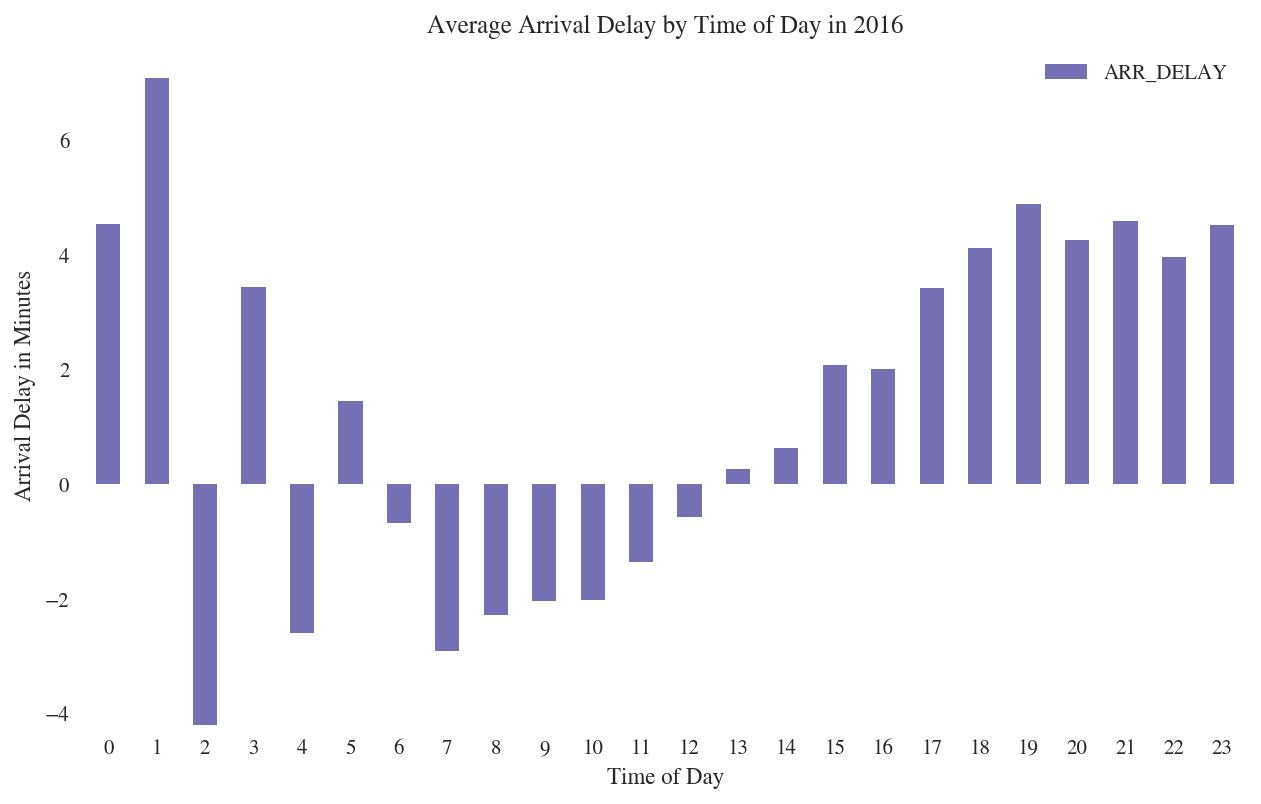

In [8]:
plot.figure(figsize=(12,6))   
data_2016[['Departure_Hour','DEP_DELAY']].groupby('Departure_Hour').mean().plot(kind='bar', color=dark2_colors[0])
plot.xticks(rotation=0)
plot.xlabel('Time of Day')
plot.ylabel('Departure Delay in Minutes')
plot.title('Average Departure Delay by Time of Day in 2016')
remove_border()

data_2016[['Arrival_Hour','ARR_DELAY']].groupby('Arrival_Hour').mean().plot(kind='bar', color=dark2_colors[2])
plot.xticks(rotation=0)
plot.xlabel('Time of Day')
plot.ylabel('Arrival Delay in Minutes')
plot.title('Average Arrival Delay by Time of Day in 2016')
remove_border()

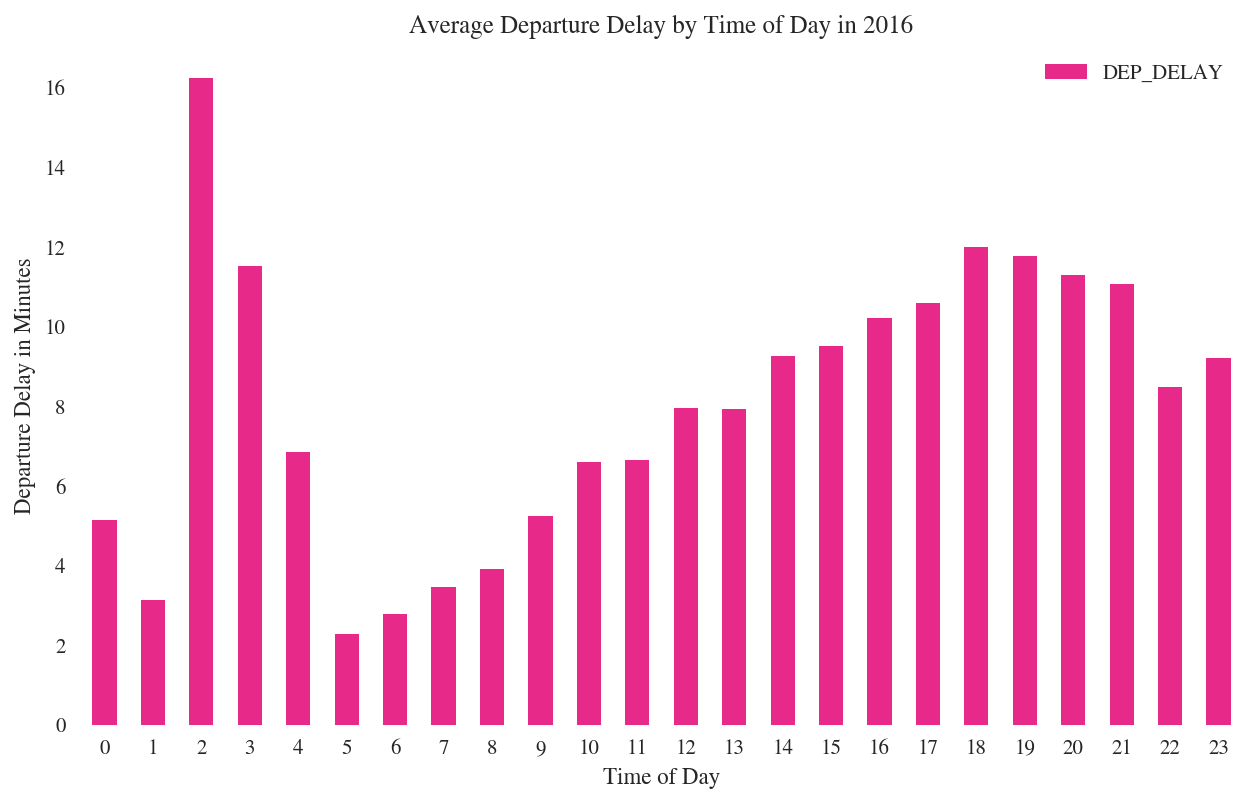

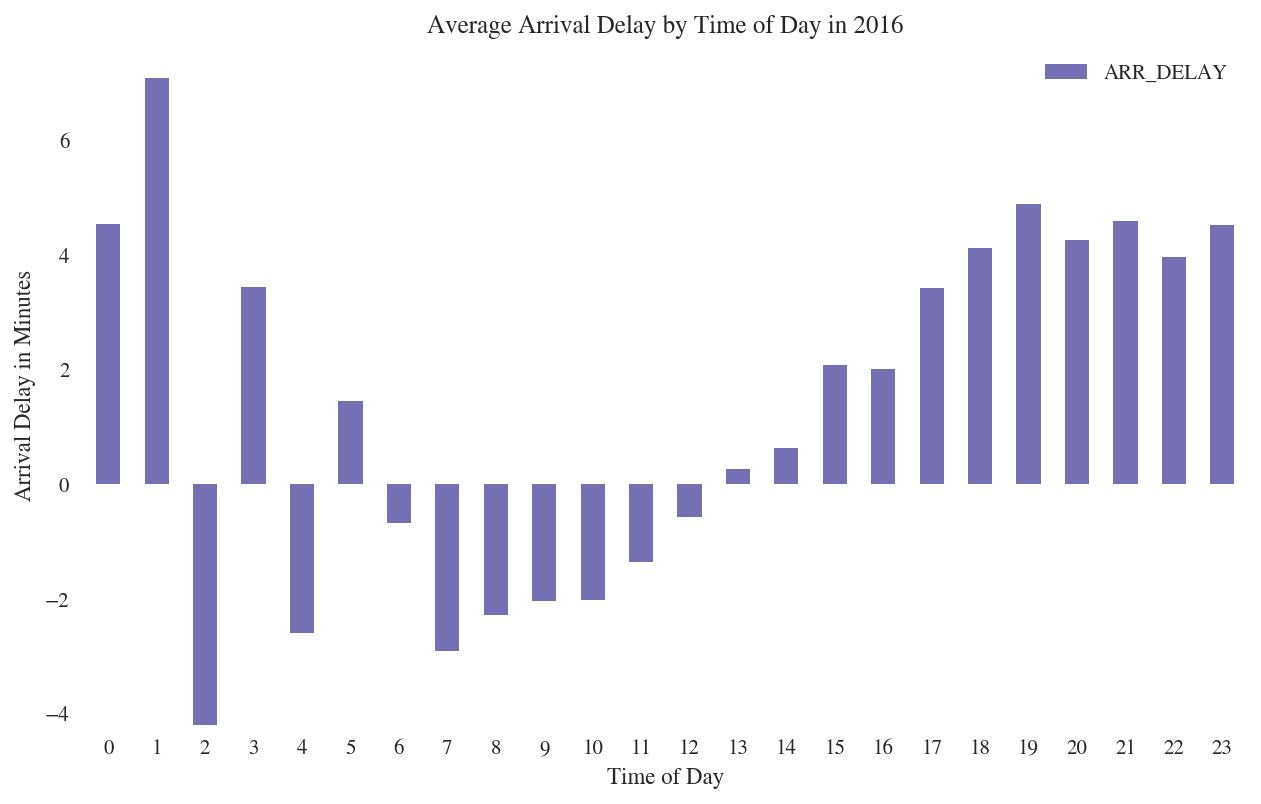

In [9]:
# examine the correlation between departure delay and arrival delay by time of day"
plot.figure(figsize=(12,6))   
data_2016[['Departure_Hour','DEP_DELAY']].groupby('Departure_Hour').mean().plot(kind='bar', color=dark2_colors[0])
plot.xticks(rotation=0)
plot.xlabel('Time of Day')
plot.ylabel('Departure Delay in Minutes')
plot.title('Average Departure Delay by Time of Day in 2016')
remove_border()

data_2016[['Arrival_Hour','ARR_DELAY']].groupby('Arrival_Hour').mean().plot(kind='bar', color=dark2_colors[2])
plot.xticks(rotation=0)
plot.xlabel('Time of Day')
plot.ylabel('Arrival Delay in Minutes')
plot.title('Average Arrival Delay by Time of Day in 2016')
remove_border()

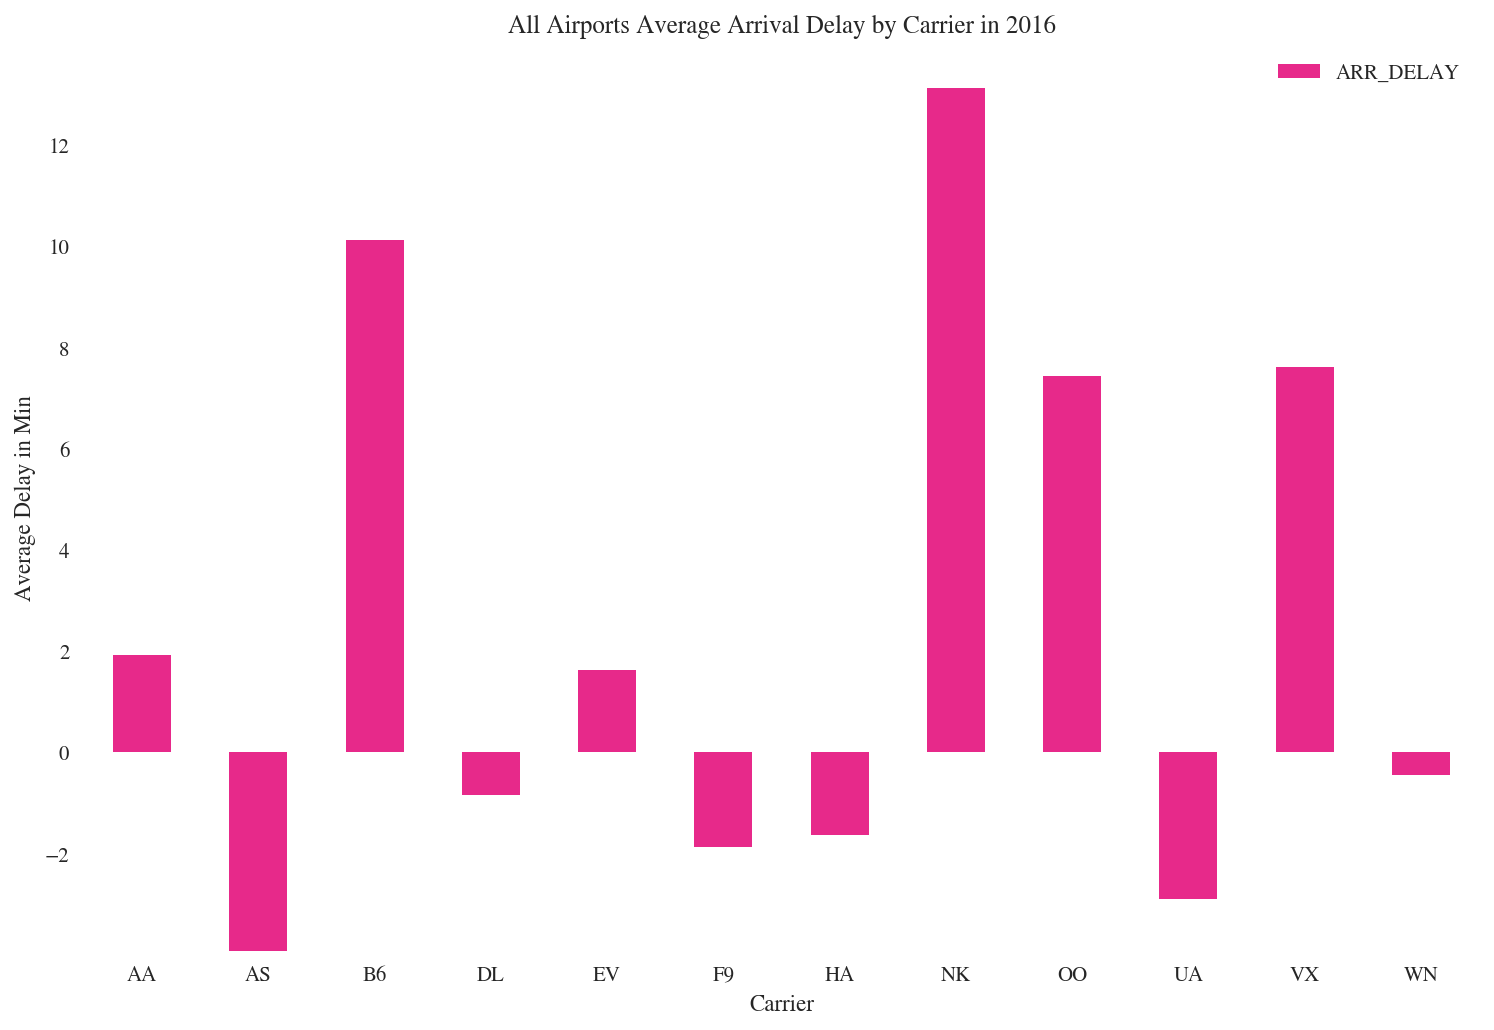

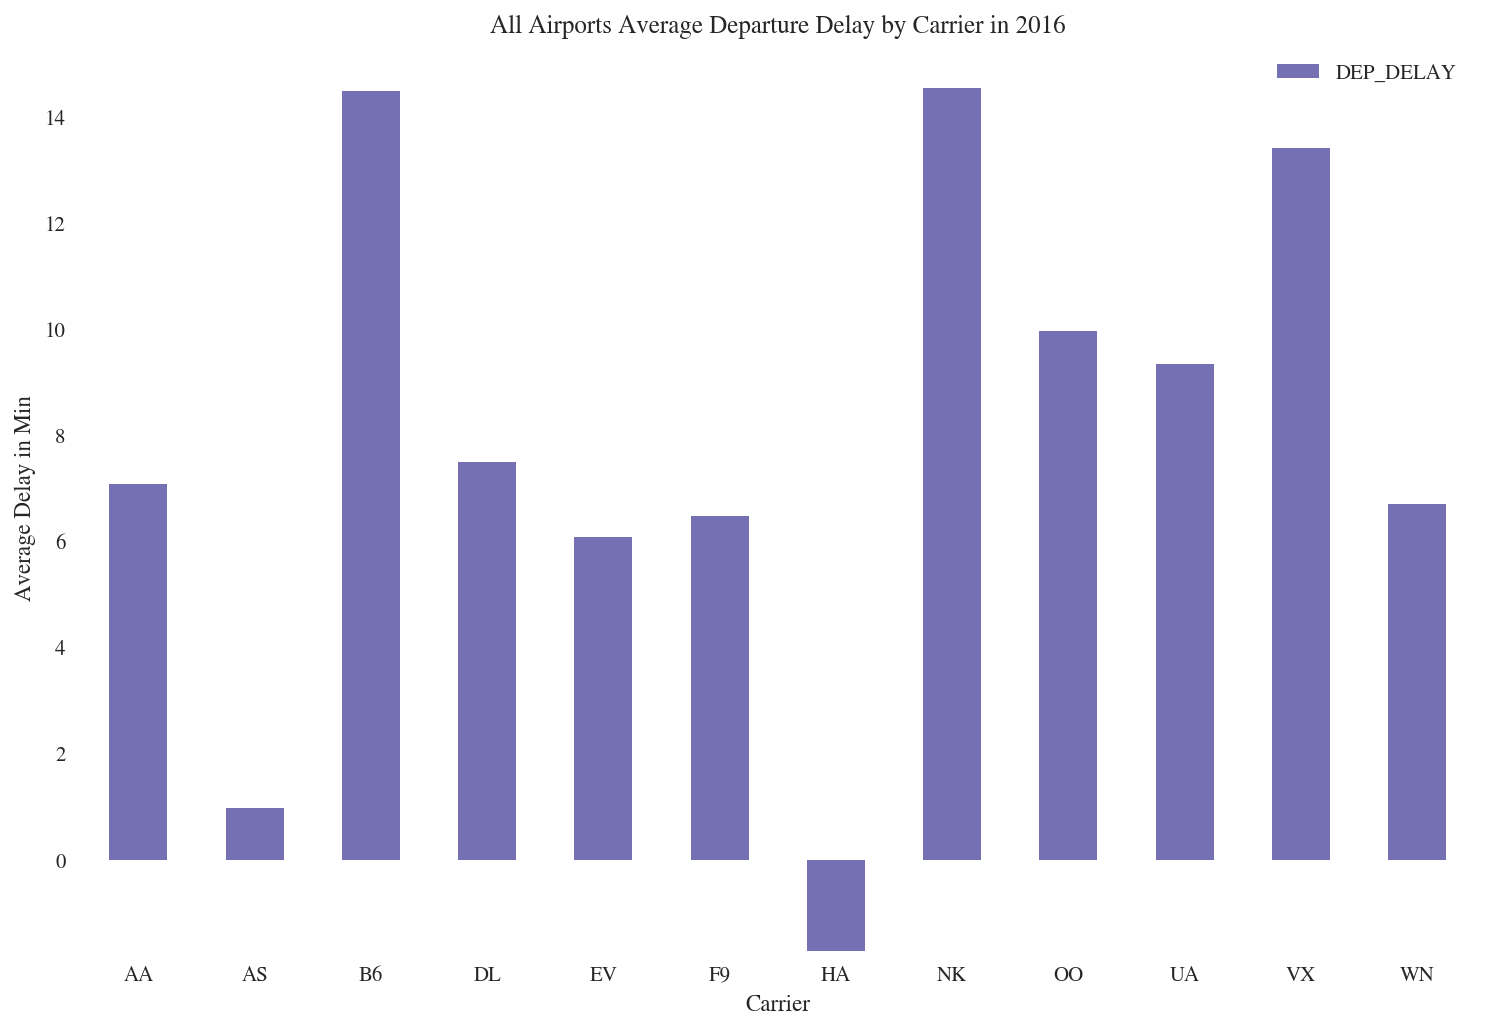

In [10]:
# Examine if specific carrier will create different delay impact
data_2016[['UNIQUE_CARRIER','ARR_DELAY']].groupby('UNIQUE_CARRIER').mean().plot(kind='bar', figsize =(12,8), color=dark2_colors[0])
plot.xticks(rotation=0)
plot.xlabel('Carrier')
plot.ylabel('Average Delay in Min')
plot.title('All Airports Average Arrival Delay by Carrier in 2016')
remove_border()

data_2016[['UNIQUE_CARRIER','DEP_DELAY']].groupby('UNIQUE_CARRIER').mean().plot(kind='bar', figsize =(12,8), color=dark2_colors[2])
plot.xticks(rotation=0)
plot.xlabel('Carrier')
plot.ylabel('Average Delay in Min')
plot.title('All Airports Average Departure Delay by Carrier in 2016')
remove_border()